In [32]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/company-stock-and-investment/Company Stock and Investment.csv


In [33]:
df=pd.read_csv('/kaggle/input/company-stock-and-investment/Company Stock and Investment.csv',index_col=['Date'], parse_dates=['Date'])

In [34]:
import warnings                                  
warnings.filterwarnings('ignore')

import numpy as np                               
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

In [35]:
df=pd.read_csv('/kaggle/input/company-stock-and-investment/Company Stock and Investment.csv')

In [36]:
df['Date']=pd.to_datetime(df['Date'])

In [37]:
df1=df

In [38]:
df1.sort_values(by='Date')

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
20,2010-01-02,0.021414,0.007418,0.013902,-0.052149
39,2010-01-03,-0.012669,0.005188,0.021357,0.051858
62,2010-01-04,0.012942,0.007172,0.004128,-0.029167
103,2010-01-06,-0.017568,0.016770,0.015377,-0.017695
...,...,...,...,...,...
1853,2017-12-05,0.000418,0.006622,0.013966,0.014489
1873,2017-12-06,0.006111,-0.000118,-0.023896,-0.013697
1894,2017-12-07,0.009321,0.006399,0.001443,0.012453
1937,2017-12-09,0.003121,-0.005771,-0.003963,0.004724


In [39]:
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [40]:
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [41]:
df1=df.tail(450)

In [42]:
df1

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1534,2016-05-02,-0.024344,-0.005189,-0.026708,-0.063645
1535,2016-08-02,-0.037265,0.037293,0.010530,-0.027941
1536,2016-09-02,-0.058903,-0.001886,-0.000211,-0.012354
1537,2016-10-02,-0.015021,-0.000840,-0.007580,0.017446
1538,2016-11-02,-0.049020,0.042857,-0.006046,0.027198
...,...,...,...,...,...
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [43]:
df1=df1.set_index(df1['Date']).drop('Date', 1)

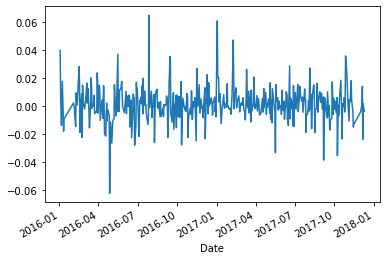

In [44]:
df1['Comp Stock'].plot()

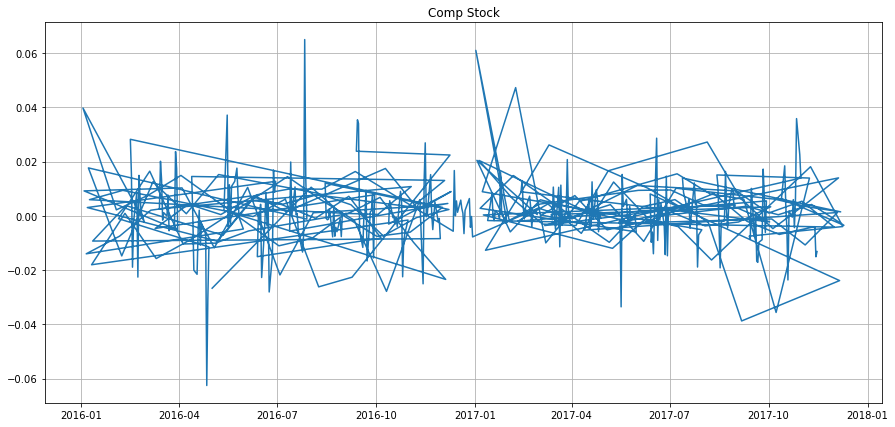

In [45]:
plt.figure(figsize=(15,7))
plt.plot(df1['Comp Stock'])
plt.title('Comp Stock')
plt.grid(True)
plt.show()

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
df1=df1.drop(['Oil Investments','Gold Investments','Other sharesInvestments'],axis=1)

In [48]:
df1

,Comp Stock
Date,
2016-05-02,-0.026708
2016-08-02,0.010530
2016-09-02,-0.000211
2016-10-02,-0.007580
2016-11-02,-0.006046
...,...
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008


In [49]:
print("Min:",df1.index.min())
print("Max:",df1.index.max())

Min: 2016-01-03 00:00:00
Max: 2017-12-10 00:00:00


In [50]:
df1.columns

Index(['Comp Stock'], dtype='object')

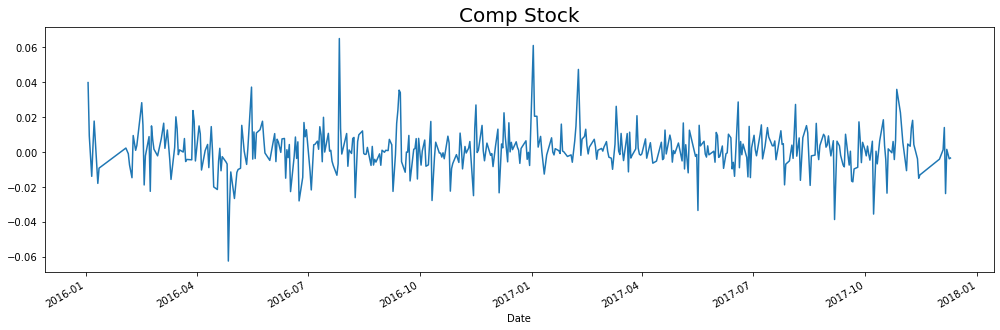

In [51]:
plt.figure(figsize=(17,5))
df1['Comp Stock'].plot()
plt.title("Comp Stock",fontsize=20)
plt.show()

In [52]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [53]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

In [55]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [56]:
df1

,Comp Stock
Date,
2016-05-02,-0.026708
2016-08-02,0.010530
2016-09-02,-0.000211
2016-10-02,-0.007580
2016-11-02,-0.006046
...,...
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008


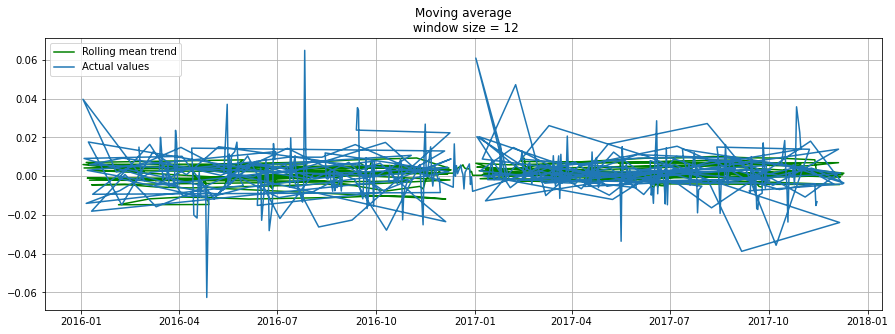

In [58]:
plotMovingAverage(df1, 12)

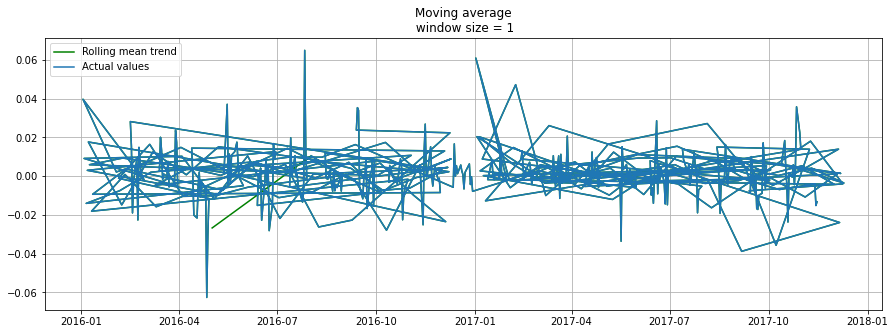

In [59]:
plotMovingAverage(df1, 1) 

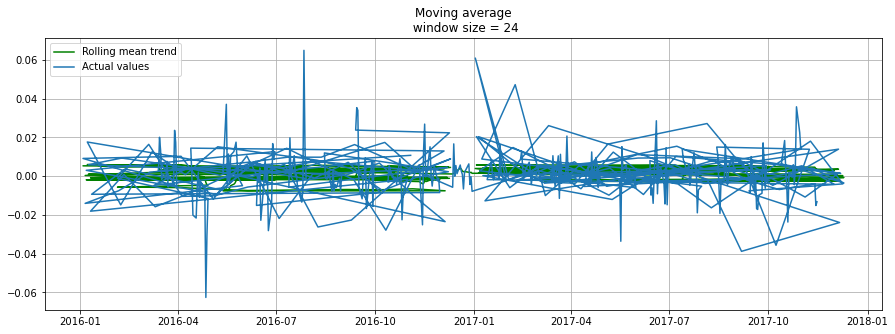

In [60]:
plotMovingAverage(df1, 24) 

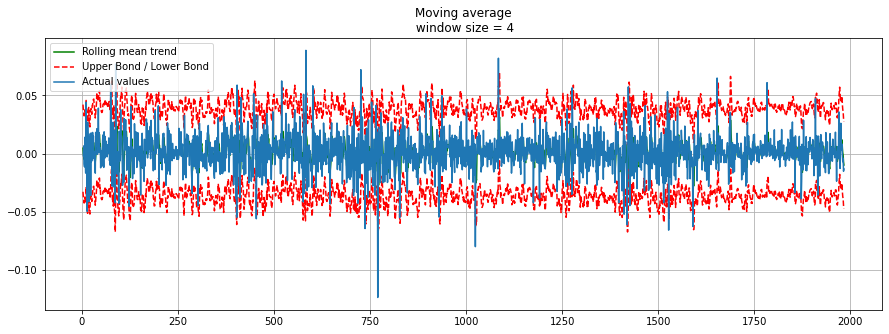

In [61]:
plotMovingAverage(df['Comp Stock'], 4, plot_intervals=True)

In [62]:
def weighted_average(series, weights):
    """
        Calculate weighter average on series
    """
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [63]:
weighted_average(df1, [0.6, 0.3, 0.1])

-0.008258808800000001

In [64]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [66]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

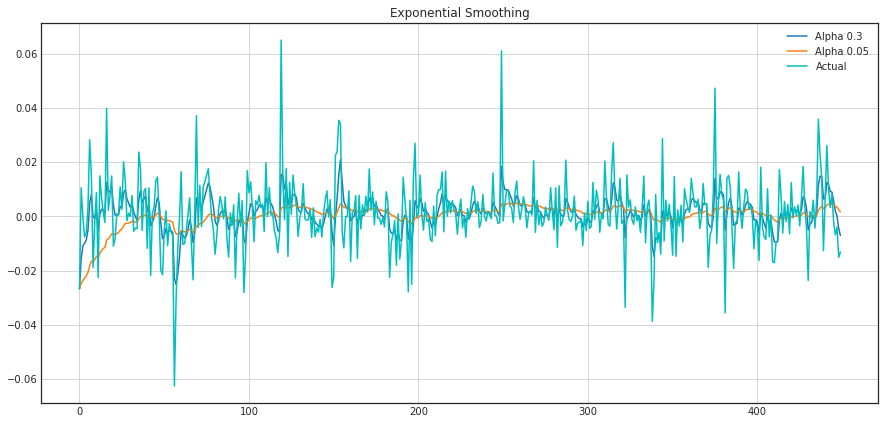

In [67]:
plotExponentialSmoothing(df1['Comp Stock'], [0.3, 0.05])

In [68]:
df1.columns

Index(['Comp Stock'], dtype='object')

In [69]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

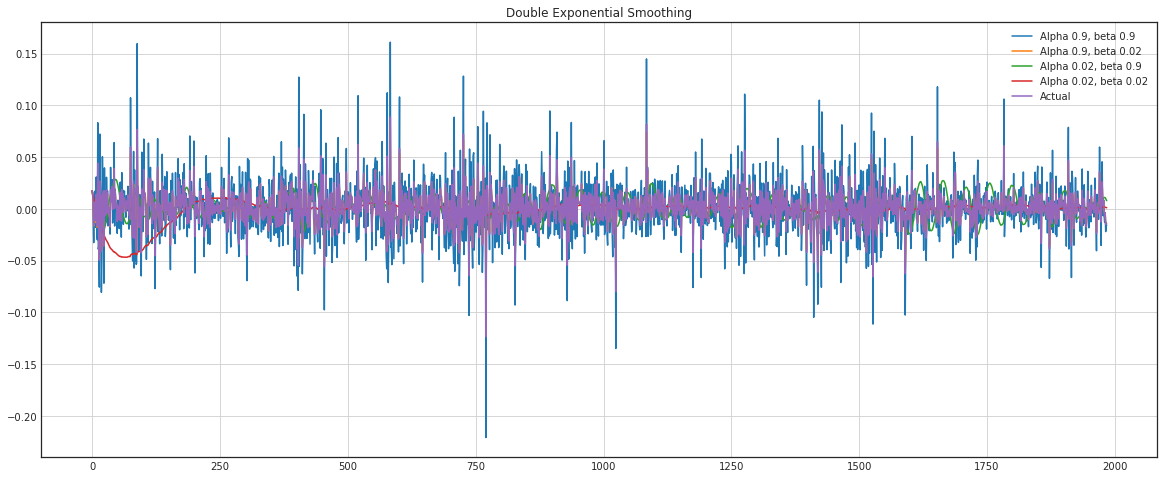

In [72]:
plotDoubleExponentialSmoothing(df['Comp Stock'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

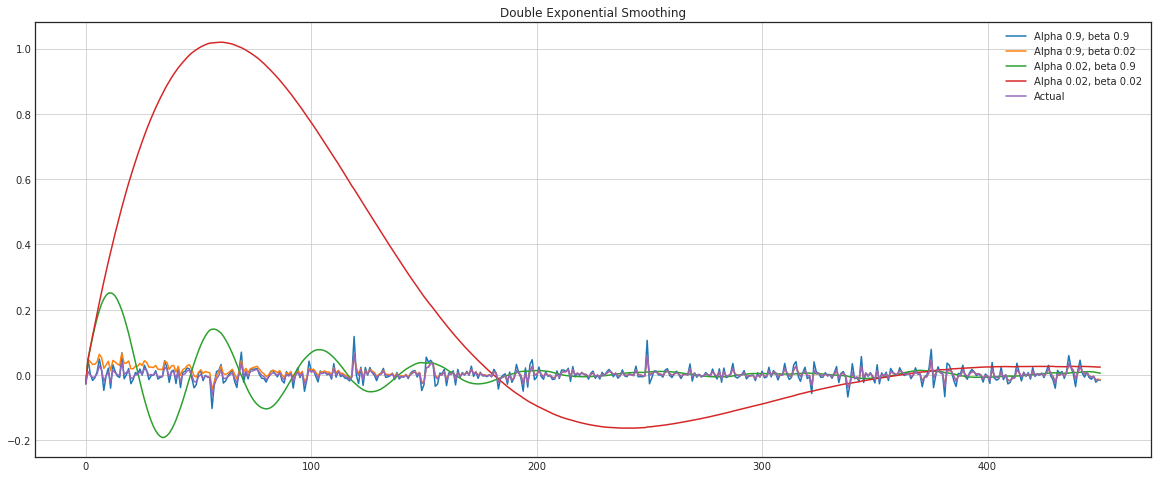

In [73]:
plotDoubleExponentialSmoothing(df1['Comp Stock'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [74]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [75]:
adfuller_test(df['Comp Stock'])

ADF Test Statistic : -12.47338626590834
p-value : 3.207774293088362e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [77]:
df=pd.read_csv('/kaggle/input/company-stock-and-investment/Company Stock and Investment.csv')

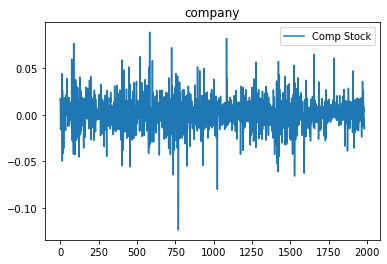

In [78]:
df[['Comp Stock']].plot()
plt.title("company")
plt.show()

Text(0.5, 1.0, 'Cumulative Returns')

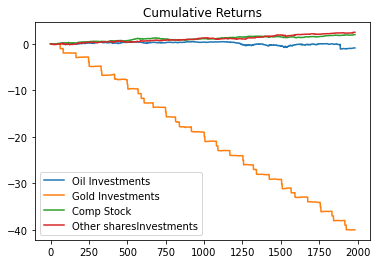

In [79]:
dr = df.cumsum()
dr.plot()
plt.title('Cumulative Returns')

Text(0.5, 1.0, 'Autocorrelation plot')

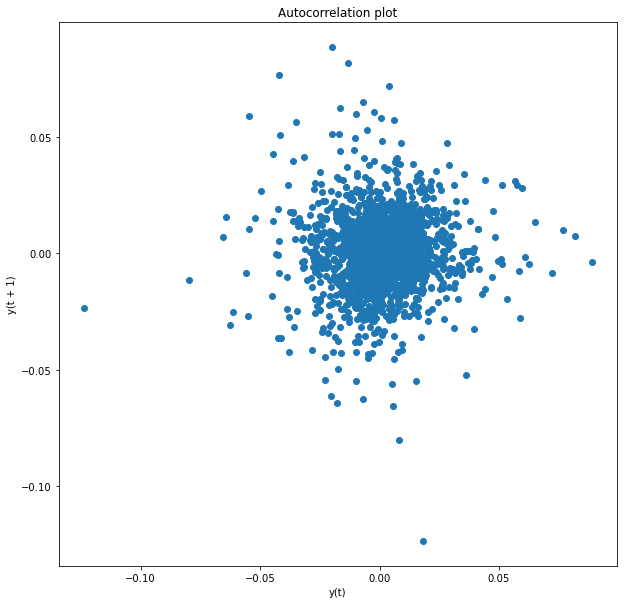

In [80]:
plt.figure(figsize=(10,10))
lag_plot(df['Comp Stock'], lag=1)
plt.title('Autocorrelation plot')

In [81]:
df1=df.drop(['Oil Investments', 'Gold Investments',
       'Other sharesInvestments'],axis=1)

In [82]:
df1

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849
...,...,...
1979,09-11-2017,-0.002043
1980,10-11-2017,-0.006880
1981,13-11-2017,-0.004008
1982,14-11-2017,-0.015118


In [83]:
df['Date']

0       31-12-2009
1       04-01-2010
2       05-01-2010
3       06-01-2010
4       07-01-2010
           ...    
1979    09-11-2017
1980    10-11-2017
1981    13-11-2017
1982    14-11-2017
1983    15-11-2017
Name: Date, Length: 1984, dtype: object

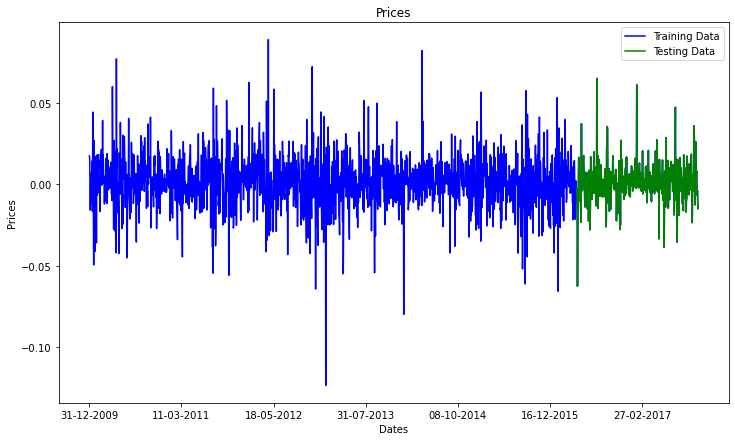

In [84]:
train_data, test_data = df1[0:int(len(df1)*0.8)], df1[int(len(df1)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df1['Comp Stock'], 'blue', label='Training Data')
plt.plot(test_data['Comp Stock'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1983, 300), df['Date'][0:1983:300])
plt.legend()



In [87]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [88]:
train_ar = train_data['Comp Stock'].values
test_ar = test_data['Comp Stock'].values


history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.000
Symmetric mean absolute percentage error: 148.197


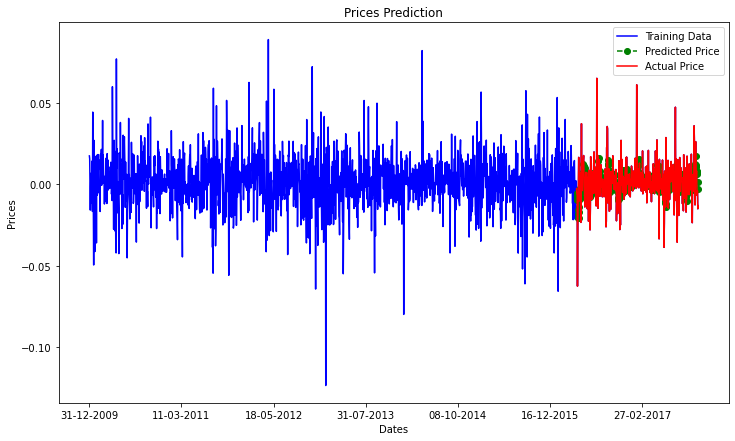

In [89]:
plt.figure(figsize=(12,7))
plt.plot(df1['Comp Stock'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Comp Stock'], color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1983, 300), df['Date'][0:1983:300])
plt.legend()

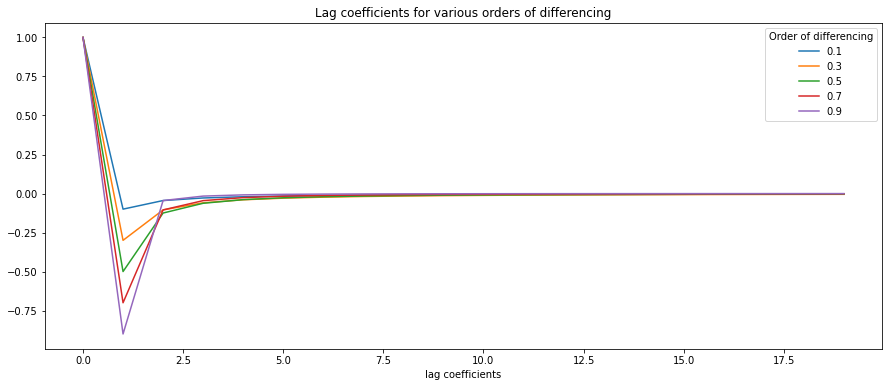

In [90]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 
plotWeights([0.1,0.9],20,5)

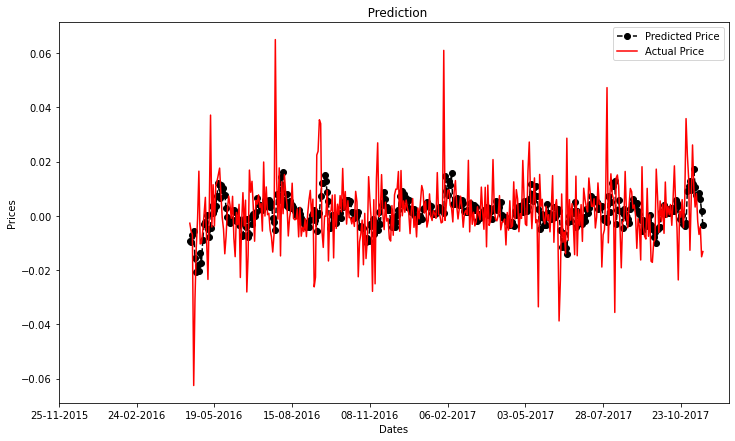

In [91]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='black', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Comp Stock'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1983, 60), df['Date'][1486:1983:60])
plt.title('  Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

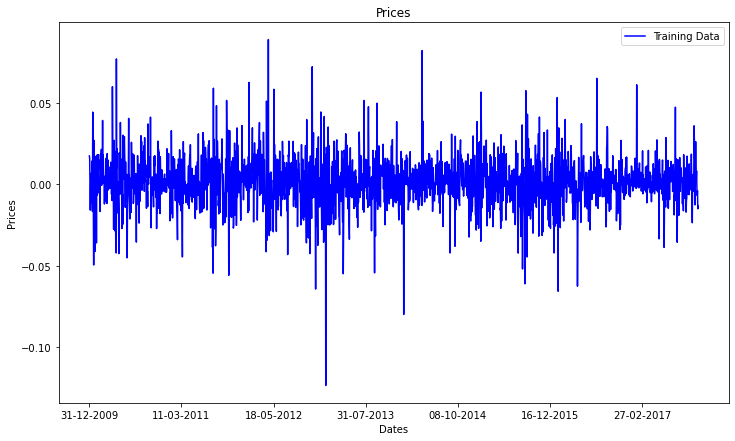

In [92]:
train_data = df1
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df1['Comp Stock'], 'blue', label='Training Data')
plt.xticks(np.arange(0,1983, 300), df['Date'][0:1983:300])
plt.legend()



In [93]:
pred_model=pd.Series(model_fit.fittedvalues, copy=True)

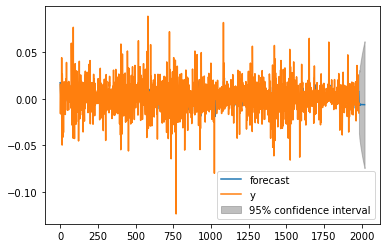

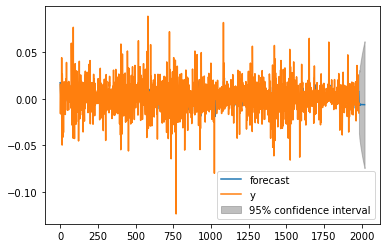

In [94]:
model_fit.plot_predict(1,2020)

In [95]:
print(pred_model.head())

0   -0.000006
1    0.000860
2    0.009270
3    0.019713
4    0.005164
dtype: float64


In [96]:
pred_model_cumsum =pred_model.cumsum()
print(pred_model_cumsum)

0      -0.000006
1       0.000854
2       0.010124
3       0.029837
4       0.035001
          ...   
1977   -0.034002
1978   -0.034956
1979   -0.024652
1980   -0.011798
1981   -0.006169
Length: 1982, dtype: float64


In [97]:
pred_model_log =pd.Series(df1['Comp Stock'],index=df.index)


In [98]:
pred_model_log =pred_model_log.add(pred_model_cumsum,fill_value=0)
pred_model_log.head()

0    0.017347
1    0.016419
2    0.011853
3    0.013931
4    0.033152
dtype: float64

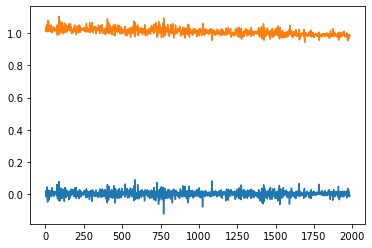

In [99]:
pred =np.exp(pred_model_log)
plt.plot(df1['Comp Stock'])
plt.plot(pred)

In [100]:
x=model_fit.forecast(steps=36)
print(x)

(array([-0.00322701, -0.0038016 , -0.00532036, -0.0068043 , -0.00620705,
       -0.00690381, -0.00540458, -0.00574573, -0.00602212, -0.00625569,
       -0.00609564, -0.00611199, -0.00595523, -0.00605089, -0.00609786,
       -0.00612478, -0.00609375, -0.00609683, -0.0060907 , -0.00611484,
       -0.00612522, -0.0061314 , -0.00613114, -0.00613771, -0.0061441 ,
       -0.00615335, -0.00615973, -0.00616564, -0.00617114, -0.00617785,
       -0.00618451, -0.0061913 , -0.00619762, -0.00620394, -0.0062103 ,
       -0.00621684]), array([0.01732476, 0.0176682 , 0.01801455, 0.01834153, 0.01901858,
       0.01970097, 0.02074953, 0.02124226, 0.02175519, 0.02228119,
       0.02287364, 0.02343942, 0.02400349, 0.02450187, 0.02500269,
       0.02550134, 0.02600053, 0.02648529, 0.02696007, 0.02742152,
       0.02787831, 0.02832901, 0.02877349, 0.02921004, 0.02963989,
       0.03006324, 0.03048127, 0.03089377, 0.03130084, 0.03170247,
       0.03209907, 0.03249083, 0.03287801, 0.03326068, 0.03363898,
    